# Analysis of the Spectrogram for different audio signals

In this notebook, we perform the analysis of the spectrogram of different audio signals in order to identify patterns and make relevant comparison. <br>
Some audio samples were taken from this online free database https://goo.gl/aogwQx and others were taken from https://soundoftext.com/ which transform text to speech. <br>
All the audio signals are sampled at   $ f_s = 24 kHz $ and are mono audio. <br>

The Spectrogram is computed using the function `matplotlib.pyplot.specgram`. <br>
We are implementing here the function `compute_spectrogram` that uses the above method but takes as input the sampling frequency $f_s$, the mono audio signal and the title for the spectrogram's plot. It has also an optional boolean input `low_pass` by default `false`, that applies a low pass filter on the audio signal before computing its spectrogram.<br>
It outputs the tuple `(spect,freqs)`. `spect` is the spectrogram's 2D array where the columns are the periodograms of successive block segments, and `freqs` is a 1D array of the frequencies corresponding to the rows of `spect`.

1. [Woman vs Man](#WvM)
2. [Wake up Words pronounced by a womam](#wuw)
3. [Spectrogram of individual letters](#letters)
<br>
<br>

In [1]:
from scipy.io import wavfile
import IPython
import numpy as np
from helpers_spectr import *
import warnings
warnings.filterwarnings('ignore')

<a id='Wvm'></a>
## 1 - Woman vs Man 

In this section, we compute the sprectrogram of a man and a women pronouning the following phrase, taken from a poem: **_Twenty five and fading fast, she was built but not to last._**<br><br>
The woman's audio was taken from a text to speech software, and to make to phrase seem more natural, we had to add pauses, which corresponds to the blank spaces on the spectrogram.
Indeed, the first block corresponds to **_Twenty five and fading fast_**, the second to **_she was built_** and the last one to **_but not to last_**. However the man's audio was taken from the aforementioned database and is actually a real person speaking.
<br>
<br>

Import woman's audio file and read it

In [17]:
fs, signal1 = wavfile.read("audio_samples/female/phrases/phrase3.wav")
IPython.display.Audio(signal1, rate=fs)
print(fs)

24000


Compute the spectrogram

(129, 885)

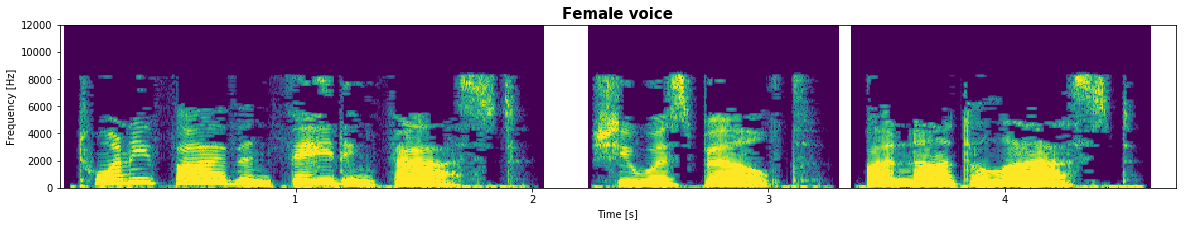

In [3]:
spec_sig, freqs = compute_spectrogram(fs, signal1, "Female voice")
spec_sig.shape

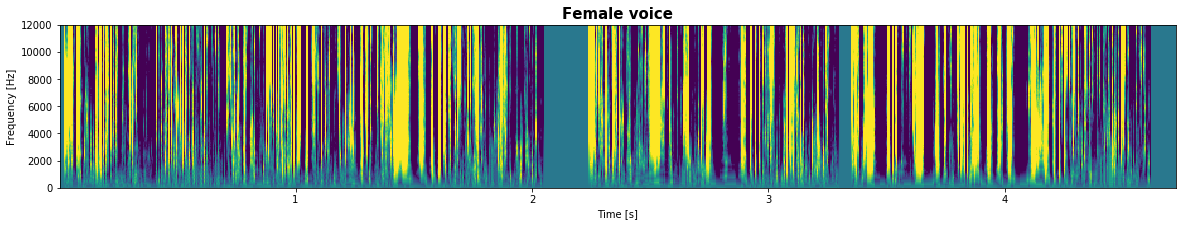

In [4]:
spec_sig, freqs = compute_spectrogram_phase(fs, signal1, "Female voice")

Import man's audio file and read it

In [18]:
fs2, signal2 = wavfile.read("audio_samples/male/phrases/phrase2.wav")
IPython.display.Audio(signal2, rate=fs2)
print(fs2)

24000


Compute the spectrogram

(129, 1124)

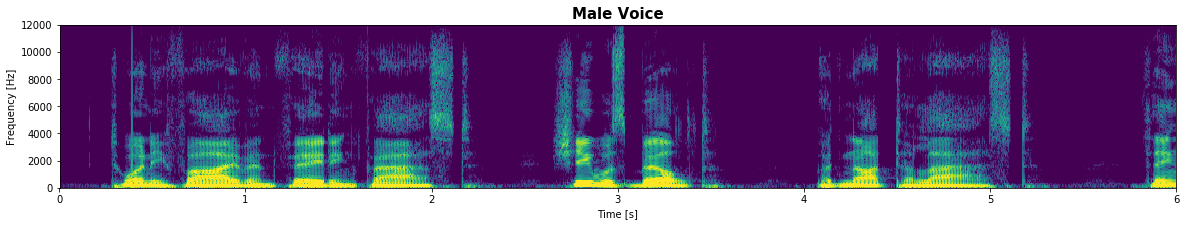

In [6]:
spec_sig, freqs = compute_spectrogram(fs2, signal2, "Male Voice")
spec_sig.shape

(129, 1124)

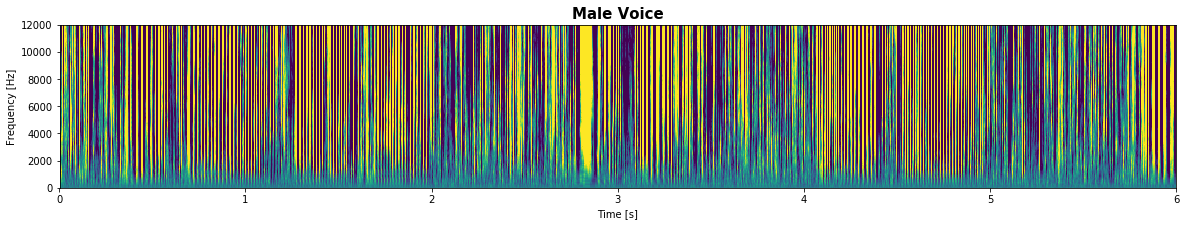

In [7]:
spec_sig, freqs = compute_spectrogram_phase(fs2, signal2, "Male Voice")
spec_sig.shape

#### **Observations** 
- Since we are sampling at $ f_s=24 kHz $, we can capture frequencies up $12 kHz$
- Women's voice is of high frequencies, it reaches frequencies up to $8000 Hz$ but is mainly around $2000 Hz$
- Men's voice is of lower frequencies, it reaches up to $4000 Hz$ and is mainly around $800 Hz$
- Voice's frequency can be associated to the pitch; a high pitch sound corresponds to a high frequency sound wave and a low pitch sound corresponds to a low frequency sound wave
<br>
<br>

<a id='wuw'></a>
## 2 - Wake Up Words pronounced by a woman

In this section we explore the differences between several wake up words pronounced by a woman. We used different type of words, some are well known to be WuW whereas others are complicated with lots of syllables. The goal is eventually to understand what makes a given word a good Wake up Word.

*** Wake Up ***

In [19]:
fs, signal1 = wavfile.read("audio_samples/female/bagOfWords/wake_up.wav")
n1 = "Wake Up"
IPython.display.Audio(signal1, rate=fs)
print(fs)

24000


*** Hello ***

In [9]:
fs, signal2 = wavfile.read("audio_samples/female/bagOfWords/hello.wav")
n2 = "Hello"
IPython.display.Audio(signal2, rate=fs)

*** Alexa ***

In [10]:
fs, signal3 = wavfile.read("audio_samples/female/bagOfWords/Alexa.wav")
n3 = "Alexa"
IPython.display.Audio(signal3, rate=fs)

*** Convoluted ***

In [11]:
fs, signal4 = wavfile.read("audio_samples/female/bagOfWords/convoluted.wav")
n4 = "Convoluted"
IPython.display.Audio(signal4, rate=fs)

*** Labyrinthine ***

In [12]:
fs, signal5 = wavfile.read("audio_samples/female/bagOfWords/labyrinthine.wav")
n5 = "Labyrinthine"
IPython.display.Audio(signal5, rate=fs)

*** Open ***

In [13]:
fs, signal6 = wavfile.read("audio_samples/female/bagOfWords/Open.wav")
n6 = "Open"
IPython.display.Audio(signal6, rate=fs)

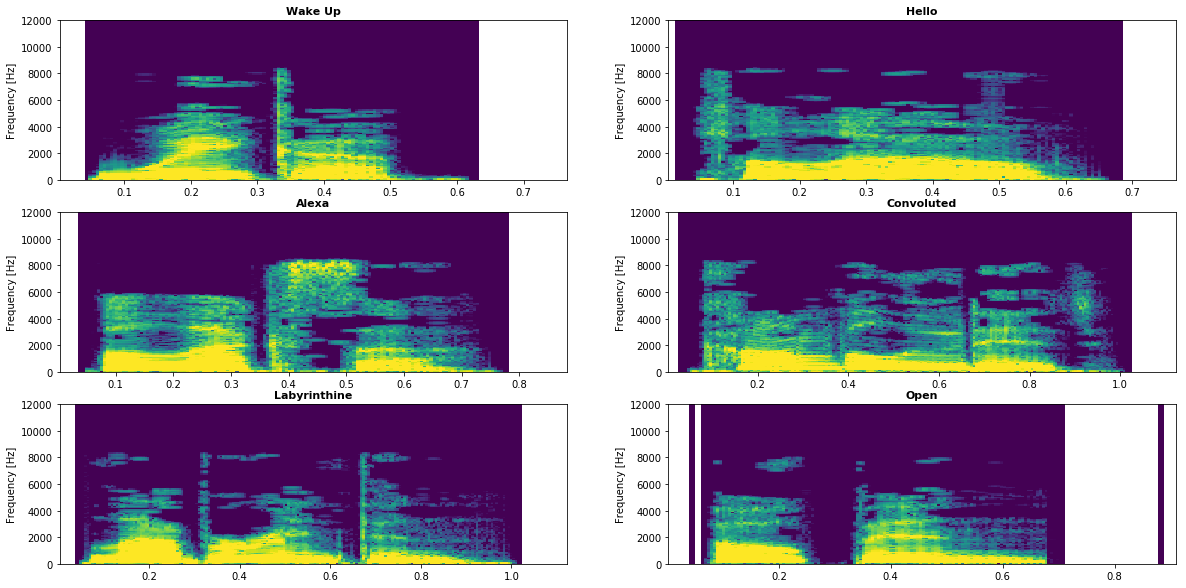

In [14]:
plot_spectrogramsOfWords(fs, (n1, signal1), (n2, signal2), (n3, signal3), (n4, signal4), (n5, signal5), (n6, signal6))

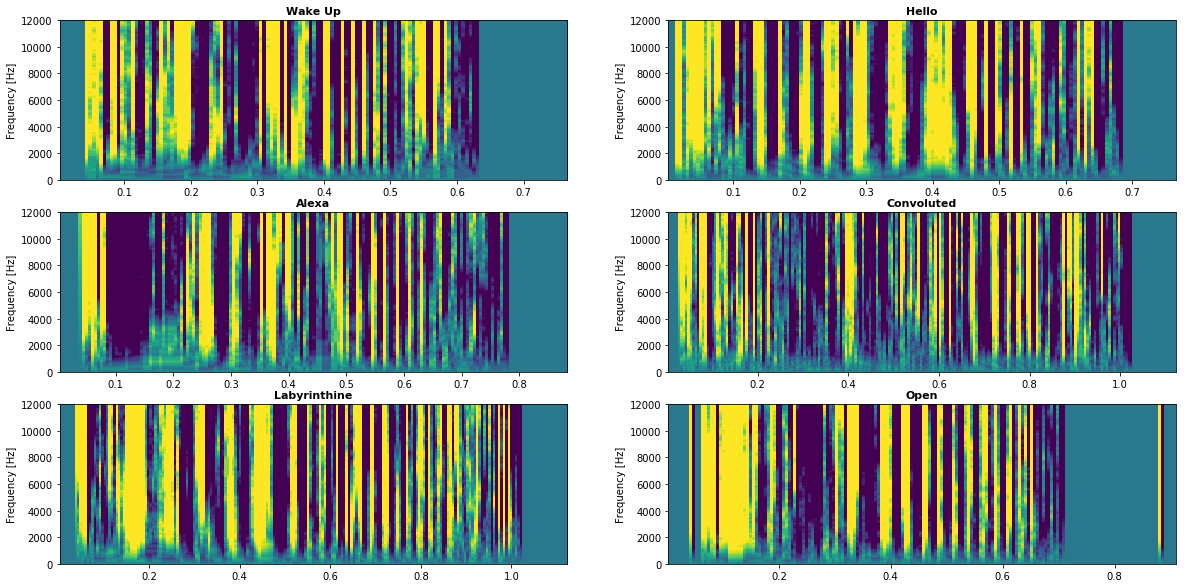

In [16]:
plot_spectrogramsOfWords_phase(fs, (n1, signal1), (n2, signal2), (n3, signal3), (n4, signal4), (n5, signal5), (n6, signal6))

#### **Observations** 
- Consonants like $c$, $h$ and $x$ have high frequencies
- Vowels like $o$ have lower frequencies

To verify these observations, lets compare the spectrograms of different letters.

<a id='letters'></a>
## 3 - Spectrogram of individual letters

In this section, we compute the spectrogram of 4 vowels and 4 consonants, to verify to aformentionned observations.

#### 3.1 - *'Wobble'* sounds

In [ ]:
fs, vowel1 = wavfile.read("audio_samples/female/letters/A.wav")
n1 = "A"

fs, vowel2 = wavfile.read("audio_samples/female/letters/E.wav")
n2 = "E"

fs, vowel3 = wavfile.read("audio_samples/female/letters/O.wav")
n3 = "O"

fs, vowel4 = wavfile.read("audio_samples/female/letters/U.wav")
n4 = "U"

In [ ]:
plot_spectrogramsOfLetters(fs, (n1, vowel1), (n2, vowel2), (n3, vowel3), (n4, vowel4))

#### 3.2 - Non *'Wobble'* sounds

In [ ]:
fs, cons1 = wavfile.read("audio_samples/female/letters/C.wav")
n1 = "C"

fs, cons2 = wavfile.read("audio_samples/female/letters/H.wav")
n2 = "H"

fs, cons3 = wavfile.read("audio_samples/female/letters/X.wav")
n3 = "X"

fs, cons4 = wavfile.read("audio_samples/female/letters/S.wav")
n4 = "S"

In [ ]:
plot_spectrogramsOfLetters(fs, (n1, cons1), (n2, cons2), (n3, cons3), (n4, cons4))

#### **Observations** 
- We can observe similarities between the vowel's and consonant's spectrogram : for exemple we can observe that the spectrogram of $C$ contains a part of the spectrogram of $E$, this because when you pronounce $C$ you are also pronouncing the letter $E$
- We say that *wobble* sounds are the carrier of the words in general

![title](images/freqOfSound.jpg)